# Code example 2: CNN binary classification on embeddings

<a href="https://colab.research.google.com/github/BioGeMT/MALTAomics-Summer-School/blob/main/Day4_WorkshopVII_DeepLearningForProteinStructure/maltaomics_ex2_embedding_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simplified from: https://github.com/ML-Bioinfo-CEITEC/pknots_experiments/blob/main/Models/M2/M2_training.ipynb

In [1]:
!pip install datasets

In [2]:
HF_DATASET_NAME = 'roa7n/maltaomics_dataset_embeddings'

Use GPU if possible:

In [3]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


## 1. Load the Dataset:

In [4]:
from datasets import Dataset, load_dataset

dss = load_dataset(HF_DATASET_NAME)
dss

DatasetDict({
    train: Dataset({
        features: ['seq', 'label', 'features', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146',

In [5]:
import pandas as pd

train_df = pd.DataFrame(dss['train'])
train_df

,seq,label,features,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,MCDHVDNIAETSTDYPHHRLTDDRPDQVFTVRTPRIIAARKLLKSA...,1,0.01041024891685538 -0.010101161301804495 0.00...,0.274333,0.332627,0.864222,0.051780,0.290819,0.416314,0.265622,...,0.344436,0.731991,0.706373,0.586763,0.367222,0.767683,0.702516,0.480774,0.656487,0.512738
1,MQRYFVNELNGIIVGDDAKHITKVMRMKINDLVIICSNNECFNARL...,1,0.0011231694213904575 0.004876096702947308 -0....,0.191549,0.541203,0.495432,0.363947,0.295502,0.379918,0.345877,...,0.386393,0.752979,0.813180,0.444563,0.414046,0.872666,0.859383,0.487147,0.646516,0.361626
2,MGRYNAASKTIAPLYIMKLDNVKKLHQKKYRQELGHCLVEGEHLVL...,1,-0.011908794518916466 -0.01223805994442273 0.0...,0.075384,0.302868,0.713191,0.223519,0.397118,0.525516,0.255614,...,0.292307,0.704365,0.707778,0.283027,0.244543,0.853651,0.671235,0.328669,0.674699,0.412016
3,MISSTTNKQVKFVNALVKKTKTRREEDLFVAEGLRMCSEIPKDRIH...,1,-0.003398883267319519 -0.0002991888930097275 -...,0.151240,0.469131,0.647254,0.345612,0.521611,0.137993,0.322313,...,0.234623,0.867671,0.768729,0.537454,0.392230,0.821933,0.866437,0.698777,0.653710,0.711766
4,MKTKLIKIILICIAIAGIIDTIILAIRSGNVDTGILSPSIGGVFII...,0,0.0019141008658607461 0.0008958481436618371 -0...,0.198599,0.485773,0.621532,0.348809,0.354556,0.317148,0.356694,...,0.267098,0.815357,0.827666,0.503102,0.412680,0.884153,0.861887,0.575498,0.710077,0.301989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,MYKNILVAIDGSEVGNLAFTSALHLAKAHSAQVCALYVVEYPRFYM...,0,-0.0074981826681366215 -0.004008465576703202 -...,0.114700,0.417475,0.586581,0.255517,0.290614,0.406848,0.350512,...,0.255315,0.894470,0.810478,0.416284,0.374980,0.883512,0.823371,0.500784,0.729528,0.497866
1596,MTNPRAGLPVVVGIDGSDAAIRAALWAIDEAMVRSVPLRLVAALSP...,0,-0.0088386241133378 -0.000934201230876397 0.01...,0.102751,0.460287,0.880715,0.016871,0.256252,0.442094,0.368493,...,0.231456,0.760399,0.666945,0.455475,0.434812,0.832554,0.684084,0.551435,0.661313,0.441998
1597,MTQTDDADLDAGRIVRGNKTYAAFTNKELLYPVRGLSKQEIVTLLP...,0,-0.00037074716693297205 -0.0014015337414434725...,0.178232,0.453779,0.667622,0.255691,0.287937,0.341453,0.326725,...,0.256040,0.925542,0.799634,0.467074,0.390284,0.852961,0.806935,0.509802,0.738464,0.386284
1598,MSSHEEVFIWPPPSRGLRIKVHVPASILSVEHGIVKKTFVLGLIAR...,1,0.016587097747830626 -0.0006801757893128979 -0...,0.329392,0.463825,0.520270,0.409591,0.461781,0.373864,0.263655,...,0.197910,0.858049,0.795178,0.433017,0.256836,0.751081,0.792204,0.582517,0.678903,0.404975


In [6]:
test_df = pd.DataFrame(dss['test'])
test_df

,seq,label,features,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,MKILVCLKQILDPEVSPRDFQVDPDRLEAVLGSASLVTNIFCENAL...,0,-0.001673037943135114 -0.007994170979024773 0....,0.432511,0.370168,0.633335,0.375320,0.191104,0.661021,0.564127,...,0.457958,0.755466,0.768368,0.409629,0.260048,0.816303,0.666299,0.455434,0.510167,0.407617
1,MSIIPDLLLLLSLVIYLVVRVKQKQPVDLKVLVIWLGLSLLLDTGI...,0,-0.007835094343970894 -0.01180256348892783 -0....,0.313559,0.276072,0.539772,0.476926,0.116401,0.464621,0.738672,...,0.551453,0.671362,0.765160,0.227835,0.300963,0.579534,0.856995,0.557308,0.522219,0.161679
2,MKLRFIWPGKTKDEHLRALVTEYLKRLQRFVRCEVIETRGVAGSNP...,1,-0.0007489768387642926 -0.001591798125900823 -...,0.450349,0.528355,0.458879,0.310129,0.268913,0.770490,0.634214,...,0.541332,0.909518,0.793434,0.440656,0.282434,0.770753,0.703003,0.525974,0.647922,0.398685
3,MPAERVLVGYVDDRRGADAVALAACAASEPGTELVLGHIRIDAWPD...,0,0.001701812636952127 -0.006498380971805773 0.0...,0.497658,0.407125,0.703221,0.166342,0.212840,0.912099,0.594748,...,0.375495,0.765654,0.616556,0.396695,0.360094,0.686519,0.656043,0.648432,0.528071,0.371964
4,MKKNPAAEPIYPADKIMGLADAIDWRERLRRQGKRLAVTNGCFDIL...,0,0.004938519848622036 -0.004270518468615592 -0....,0.560139,0.462170,0.519525,0.307048,0.247132,0.573341,0.620588,...,0.462267,0.933068,0.738581,0.397040,0.318859,0.706382,0.704963,0.495272,0.676580,0.310349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,MPIIYIDSLDHPGVDIFYALTEAQLRNKQHSDKGLFIAESPKVIEV...,1,-0.0018363367888696303 -0.004562263703434155 -...,0.429358,0.454962,0.427044,0.345801,0.282174,0.759272,0.573959,...,0.512101,0.643565,0.774574,0.451107,0.241998,0.748438,0.581705,0.425192,0.417576,0.313954
396,MRPGEAPFTERTPRVAAARALLRRQGRERAGRFLAEGPQAVGEAVG...,1,0.01342363320108575 -0.012741954989063053 0.00...,0.723935,0.252862,0.726013,0.248665,0.094533,0.530848,0.446466,...,0.411411,0.699504,0.559890,0.437485,0.172178,0.690856,0.786554,0.532373,0.709500,0.401643
397,MNRRECLNECEEIRKSEVDRKFDLITRNLKEVVGGDRIKPILENRD...,0,0.01941005889264602 0.00428727048117139 0.0044...,0.839496,0.673612,0.670803,0.305928,0.191123,0.667698,0.551769,...,0.595246,0.757405,0.840623,0.510160,0.324941,0.587875,0.631386,0.444296,0.547470,0.329889
398,MTEVKNILVALDLTNIDDTLINYTSFISELLGAEKVYFVHNIKKYE...,0,-0.003452673845544041 0.000501893857176583 -0....,0.398157,0.580085,0.522640,0.339521,0.188003,0.725563,0.853693,...,0.505515,0.889164,0.759271,0.461842,0.486225,0.728897,0.798478,0.337703,0.374474,0.198847


## Define CNN architecture

Adapted from: https://www.frontiersin.org/articles/10.3389/fgene.2020.568546/full

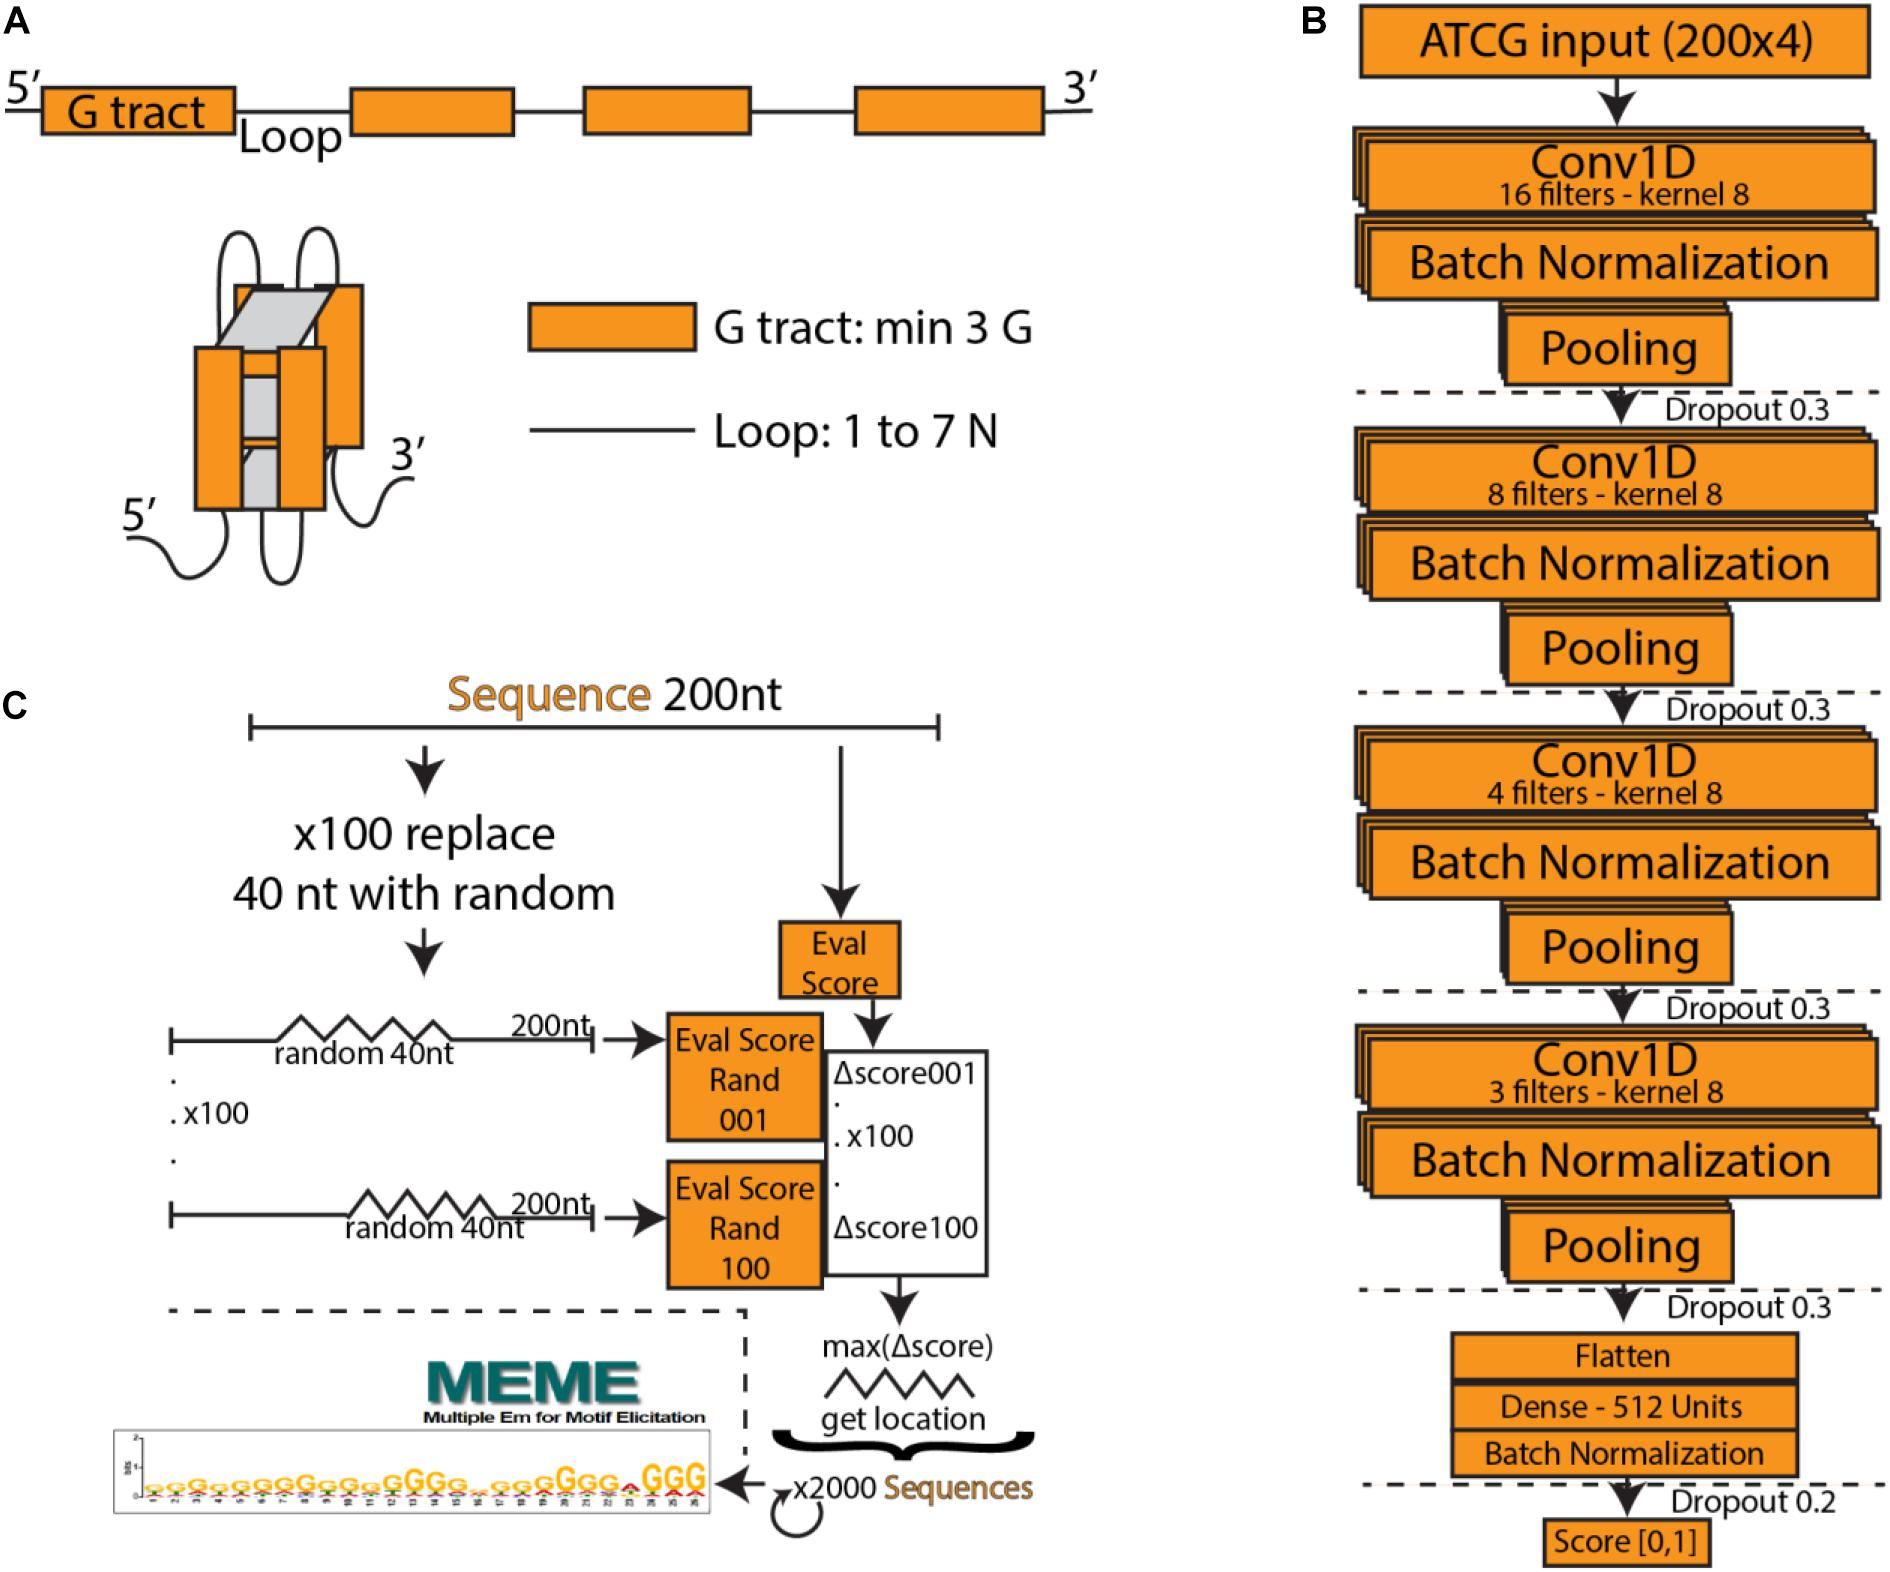

In [7]:
import numpy as np
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class CNN(nn.Module):
    def __init__(self, device):
        super(CNN, self).__init__()

        self.device = device

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=7, padding=0)
        self.batchnorm = nn.BatchNorm1d(32)
        self.relu = nn.ReLU()
        self.flat = nn.Flatten()
        self.lin1 = nn.Linear(32576, 512)
        self.lin2 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

        self.loss = nn.functional.binary_cross_entropy

    def forward(self, X):
        X = self.conv1(X)
        X = self.batchnorm(X)
        X = self.relu(X)
        X = self.flat(X)
        X = self.lin1(X)
        X = self.lin2(X)
        X = self.sigmoid(X)
        return X

    def train_model(self, dataset, epochs):
        model.train()
        optimizer = torch.optim.Adam(self.parameters())

        for epoch in range(epochs):
            with tqdm(dataset, unit='batch') as tepoch:
                for inputs, targets in tepoch:

                    inputs, targets = inputs.to(self.device), targets.to(self.device)
                    tepoch.set_description(f'Epoch {epoch + 1}')

                    # clear the gradients
                    optimizer.zero_grad()
                    # compute the model output
                    yhat = self(inputs.float())
                    # calculate accuracy
                    correct = (torch.round(yhat) == targets).sum().item()
                    accuracy = correct / len(inputs)
                    # calculate loss
                    loss = self.loss(yhat, targets.float())
                    # credit assignment
                    loss.backward()
                    # update model weights
                    optimizer.step()

                    tepoch.set_postfix(loss=loss.item(), accuracy=100. * accuracy)

    def test(self, dataloader):
        model.eval()
        predictions, actuals = list(), list()

        with torch.no_grad():
            for inputs, targets in dataloader:
                inputs = inputs.to(self.device)

                # evaluate the model on the test set
                yhat = self(inputs.float())
                yhat = yhat.cpu().detach().numpy()
                actual = targets.numpy()

                # reshape for stacking
                actual = actual.reshape((len(actual), 1))
                yhat = yhat.reshape((len(yhat), 1))
                # store

                predictions.append(yhat)
                actuals.append(actual)

        predictions, actuals = np.vstack(predictions), np.vstack(actuals)
        print(f'Predictions: {predictions[:10]}')
        print(f'Real labels: {actuals[:10]}')

        # calculate accuracy
        pred_label = np.round(predictions)
        acc = metrics.accuracy_score(actuals, pred_label)
        f1 = metrics.f1_score(actuals, pred_label, average='binary', zero_division=0)
        precision, recall, thresholds = metrics.precision_recall_curve(actuals, predictions)
        auprc = metrics.auc(recall, precision)

        print(f'Test metrics: \n Accuracy: {float(acc):>6f}, F1 score: {float(f1):>6f}, AUPRC: {float(auprc):>6f}\n')
        return acc, f1, auprc

In [8]:
class EmbeddingDataset(Dataset):
    def __init__(self, df):
        self.X = np.expand_dims(df.drop(columns=['label', 'seq', 'features']), axis=1)
        self.y = np.expand_dims(df['label'].to_numpy(), axis=1)
        self.len = len(df)

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dset = EmbeddingDataset(train_df)
train_loader = DataLoader(train_dset, batch_size=32, shuffle=True)
test_dset = EmbeddingDataset(test_df)
test_loader = DataLoader(test_dset, batch_size=1, shuffle=False)

In [9]:
model = CNN(device=device).to(device)
model

CNN(
  (conv1): Conv1d(1, 32, kernel_size=(7,), stride=(1,))
  (batchnorm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (flat): Flatten(start_dim=1, end_dim=-1)
  (lin1): Linear(in_features=32576, out_features=512, bias=True)
  (lin2): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [10]:
model.train_model(train_loader, 4)

Epoch 4: 100%|██████████| 50/50 [00:18<00:00,  2.66batch/s, accuracy=62.5, loss=37.5]


In [11]:
model.test(test_loader)

Predictions: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Real labels: [[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]
Test metrics: 
 Accuracy: 0.480000, F1 score: 0.000000, AUPRC: 0.760000



(0.48, 0.0, 0.76)